
<img src="ALMAARC.png" width="250" height="240"  align="right"/> 



<hr style="border:2px solid darkblue"> </hr>

# NB5. Query By Spatial Resolution


<hr style="border:2px solid darkblue"> </hr>



-------------

The relevant columns in the ALMA Archive datasets are 
* *spatial_resolution*
 
--------- ----- -----





Import all necessary modules

In [1]:
import numpy as np
import pandas as pd
import pyvo

service = pyvo.dal.TAPService("https://almascience.eso.org/tap")



<hr style="border:2px solid darkblue"> </hr>


## Query a given spatial resolution within a science keyword and data type
<hr style="border:2px solid darkblue"> </hr>




In [8]:
def query_spatialresolution(sci_key, dtype, res_min, res_max):


    query = f"""   
            SELECT * 
            FROM ivoa.obscore 
            WHERE  
            science_keyword like '%{sci_key}%'  
            AND  
            science_observation = 'T' 
            AND  
            dataproduct_type = '{dtype}'  
            AND  
            spatial_resolution < '{res_max}'  
            AND  
            spatial_resolution > '{res_min}'  
            """
    
    return service.search(query).to_table().to_pandas()

------------------------------------------------------- 

## Example 5a: Query all continuum observations of starburst galaxies with spatial resolution <0.05 arcsec

In [9]:
output_cont = query_spatialresolution('Starburst galaxies', 'image', 0, 0.1)
output_cont.head(5)

,access_url,access_format,proposal_id,data_rights,gal_longitude,gal_latitude,obs_publisher_did,obs_collection,facility_name,instrument_name,...,frequency,velocity_resolution,obs_creator_name,pub_title,first_author,qa2_passed,bib_reference,science_keyword,scientific_category,lastModified
0,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00990.S,Public,223.393976,-54.402914,ADS/JAO.ALMA#2016.1.00990.S,ALMA,JAO,ALMA,...,138.026657,8242.256222,"Barro, Guillermo",,,T,,"Starburst galaxies, Galaxy structure & evolution",Active galaxies,2021-06-16T16:46:50.431
1,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00048.S,Public,223.955959,-54.231119,ADS/JAO.ALMA#2016.1.00048.S,ALMA,JAO,ALMA,...,343.990133,26767.001161,"Hodge, Jacqueline",ALMA 200 pc Resolution Imaging of Smooth Cold ...,"Hodge, J. A. Rujopakarn, W.",T,2019ApJ...876..130H 2019ApJ...882..107R,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431
2,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00048.S,Public,223.104592,-54.317497,ADS/JAO.ALMA#2016.1.00048.S,ALMA,JAO,ALMA,...,343.989864,26767.001161,"Hodge, Jacqueline",ALMA 200 pc Resolution Imaging of Smooth Cold ...,"Hodge, J. A. Rujopakarn, W.",T,2019ApJ...876..130H 2019ApJ...882..107R,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431
3,http://almascience.org/aq?member_ous_id=uid://...,text/html,2015.1.01227.S,Public,53.436745,-36.256988,ADS/JAO.ALMA#2015.1.01227.S,ALMA,JAO,ALMA,...,678.992756,13758.210504,"Thomson, Alasdair",,,T,,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431
4,http://almascience.org/aq?member_ous_id=uid://...,text/html,2016.1.00048.S,Public,223.816492,-54.259375,ADS/JAO.ALMA#2016.1.00048.S,ALMA,JAO,ALMA,...,343.990074,26767.001161,"Hodge, Jacqueline",ALMA 200 pc Resolution Imaging of Smooth Cold ...,"Hodge, J. A. Rujopakarn, W.",T,2019ApJ...876..130H 2019ApJ...882..107R,"Starburst galaxies, Sub-mm Galaxies (SMG)",Active galaxies,2021-06-16T16:46:50.431


This is the distributions of high spatial-resolution continuum observations of starburst galaxies:

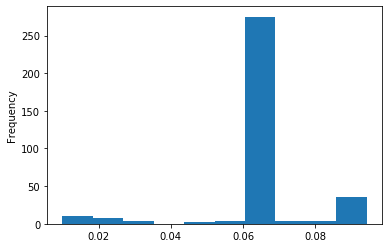

In [13]:
output_cont['spatial_resolution'].plot.hist(bins=10)

In [15]:
len(np.unique(output_cont['target_name'])), np.unique(output_cont['target_name'])

(86, array(['3c368', 'ALESS_112.1', 'ALESS_15.1', 'ALESS_17.1', 'ALESS_3.1',
        'ALESS_76.1', 'ALESS_9.1', 'AzTEC-3', 'AzTEC_8', 'GDS-25998',
        'GDS-9834', 'HELMS_182', 'HELMS_34', 'HELMS_42', 'HELMS_65',
        'J2054-0005', 'SDSS_J2310+1855', 'SGP-33512', 'SGP-466329',
        'SGP-51987', 'SGP-759717', 'SGP38326', 'SMMJ21352-0102', 'UDF2',
        'UDF3', 'VV2006_J205724.2-003019', 'scuba2-035', 'scuba2-038',
        'scuba2-041', 'scuba2-046', 'scuba2-048', 'scuba2-053',
        'scuba2-054', 'scuba2-055', 'scuba2-061', 'scuba2-062',
        'scuba2-064', 'scuba2-065', 'scuba2-066', 'scuba2-067',
        'scuba2-068', 'scuba2-069', 'scuba2-070', 'scuba2-072',
        'scuba2-074', 'scuba2-075', 'scuba2-076', 'scuba2-077',
        'scuba2-080', 'scuba2-083', 'scuba2-084', 'scuba2-085',
        'scuba2-086', 'scuba2-089', 'scuba2-091', 'scuba2-093',
        'scuba2-094', 'scuba2-095', 'scuba2-097', 'scuba2-098',
        'scuba2-099', 'scuba2-100', 'scuba2-101', 'scuba2-10


--------------------------------
## Example 5a: Query all spectral observations of starburst galaxies with spatial resolution <0.1 arcsec

In [16]:
output_spec = query_spatialresolution('Starburst galaxies', 'cube', 0, 0.1)


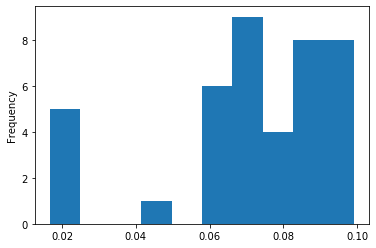

In [17]:
output_spec['spatial_resolution'].plot.hist(bins=10)

In [18]:
len(np.unique(output_spec['target_name'])), np.unique(output_spec['target_name'])

(11, array(['AzTEC-3', 'AzTEC_8', 'BRI1335', 'CDFS_12631', 'GDS-25998',
        'NB2315', 'PKS_0529-549', 'SGP38326', 'SGP54107', 'SMMJ21352-0102',
        'VV2006_J205724.2-003019'], dtype=object))